# Indian Hotel Reviews

![Gobibo](https://in.goibibo.com/static/extranet/images/mobile.png)

#### Problem Statement

* Given a set of Indian hotel reviews figure out if there is a way to predict ratings based on
  * Amenities.
  * Overall Ratings based on Specific Ratings.
  * Regional bias

#### Sample Data

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
indian_hotels = pd.read_csv("data/goibibo_com-travel_sample.csv")

In [3]:
indian_hotels.head()

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,...,room_count,room_facilities,room_type,similar_hotel,site_review_count,site_review_rating,site_stay_review_rating,sitename,state,uniq_id
0,Room Service|Internet Access|Restaurant|Free I...,"15th Mile, N.H.21,Manali, District Kullu,Himac...",Others,Manali,India,2016-07-24,85.0,NaN,gostays,The standard check-in time is 12:00 PM and the...,...,17,Room Service |Basic Bathroom Amenities|Cable /...,Deluxe Room,https://www.goibibo.com/hotels/woodchime-homes...,87.0,4.0,Service Quality::3.9|Amenities::3.7|Food and D...,goibibo,Himachal Pradesh,2c8db027d43a9452a43e88eb30d9f983
1,Room Service|Gym/Spa,"A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...",Sushant Lok,Gurgaon,India,2016-07-24,87.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,18,Room Service |Air Conditioning |Basic Bathroom...,Deluxe Room With Free WIFI,https://www.goibibo.com/hotels/stepinn-iffco-c...,8.0,4.5,Service Quality::4.7|Amenities::4.7|Food and D...,goibibo,Haryana,e98f69f889c0235e6dc480e7df6de0de
2,Restaurant|Swimming Pool,"Cobra Vaddo,Calungate Baga Road, Bardez, Calan...",Calangute Area,Goa,India,2016-07-24,50.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,15,Room Service |Air Conditioning |Cable / Satell...,Standard Room,https://www.goibibo.com/hotels/sunrise-beach-r...,2.0,2.5,Service Quality::2.5|Amenities::2.5|Food and D...,goibibo,Goa,9b59d00eaffc273d83000ed7dcda0e83
3,NaN,Simsa,Village Simsa,Manali,India,2016-07-24,100.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,24,Basic Bathroom Amenities|Cable / Satellite / P...,Deluxe Room,https://www.goibibo.com/hotels/green-cottages-...,1.0,5.0,Service Quality::5.0|Amenities::5.0|Food and D...,goibibo,Himachal Pradesh,df0971f9c5501af112485ee28b468ce5
4,Internet Access|Restaurant,"8180 Street No.-6,Arakashan Road,Paharganj",Paharganj,Delhi,India,2016-07-24,63.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,20,Basic Bathroom Amenities|Cable / Satellite / P...,Standard Room Non AC,https://www.goibibo.com/hotels/delhi-continent...,121.0,2.8,Service Quality::2.7|Amenities::2.6|Food and D...,goibibo,Delhi,0c3514344c9cda8718f558e84bdb44ef


*Source: https://www.kaggle.com/PromptCloudHQ/hotels-on-goibibo/data *

In [4]:
indian_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 36 columns):
additional_info             3192 non-null object
address                     4000 non-null object
area                        3965 non-null object
city                        4000 non-null object
country                     4000 non-null object
crawl_date                  4000 non-null object
guest_recommendation        2416 non-null float64
hotel_brand                 389 non-null object
hotel_category              4000 non-null object
hotel_description           3983 non-null object
hotel_facilities            3806 non-null object
hotel_star_rating           4000 non-null int64
image_count                 4000 non-null int64
latitude                    4000 non-null float64
locality                    3965 non-null object
longitude                   4000 non-null float64
pageurl                     4000 non-null object
point_of_interest           3760 non-null object
property_id

#### Data Correlation

In [5]:
corr_mat = indian_hotels.corr()

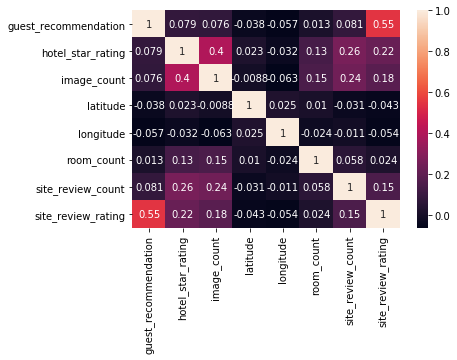

In [6]:
sns.heatmap(corr_mat, annot=True)

In [7]:
indian_hotels.columns

Index(['additional_info', 'address', 'area', 'city', 'country', 'crawl_date',
       'guest_recommendation', 'hotel_brand', 'hotel_category',
       'hotel_description', 'hotel_facilities', 'hotel_star_rating',
       'image_count', 'latitude', 'locality', 'longitude', 'pageurl',
       'point_of_interest', 'property_id', 'property_name', 'property_type',
       'province', 'qts', 'query_time_stamp', 'review_count_by_category',
       'room_area', 'room_count', 'room_facilities', 'room_type',
       'similar_hotel', 'site_review_count', 'site_review_rating',
       'site_stay_review_rating', 'sitename', 'state', 'uniq_id'],
      dtype='object')

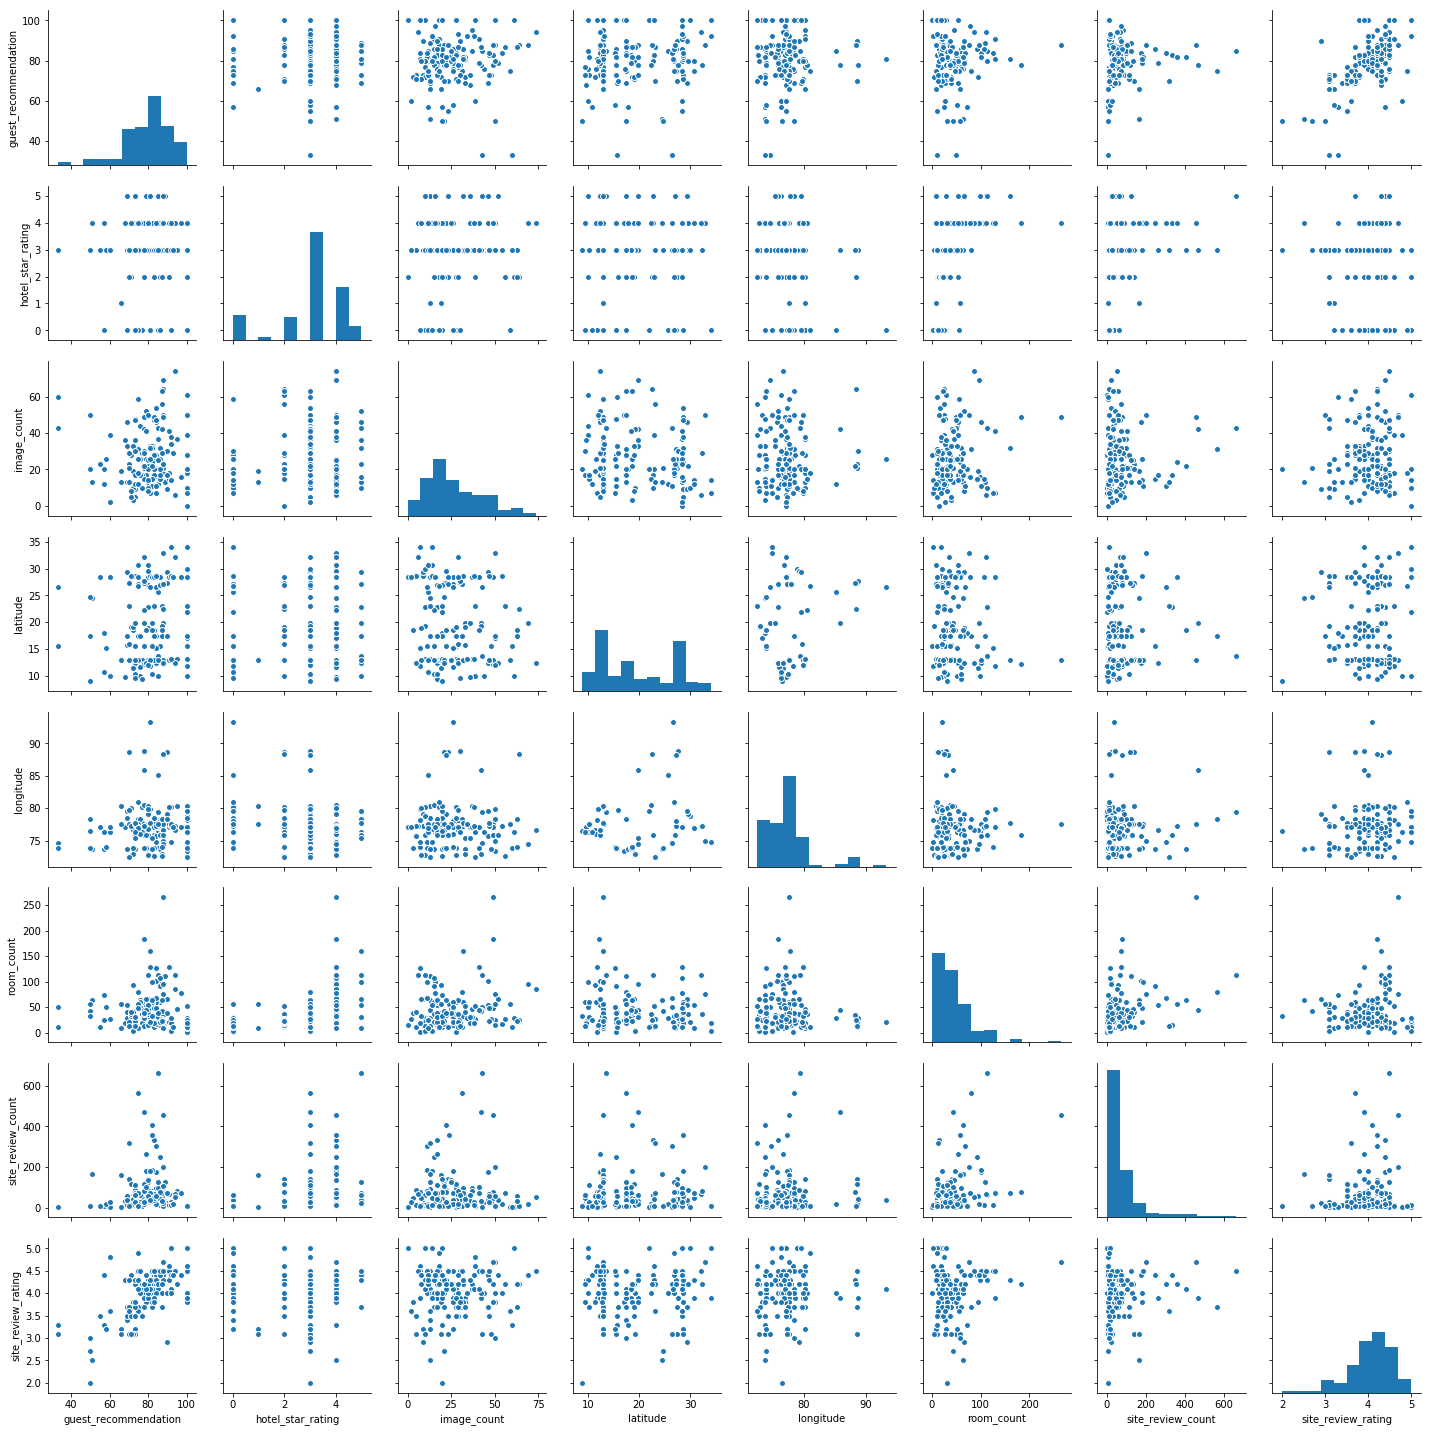

In [8]:
sns.pairplot(indian_hotels.dropna())

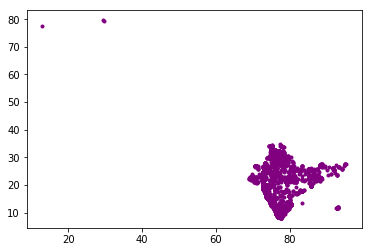

In [9]:
import matplotlib.pyplot as plt
plt.scatter(indian_hotels['longitude'], indian_hotels['latitude'], marker='.', color="purple")

In [10]:
indian_hotels[indian_hotels['longitude'] < 60 ]

,additional_info,address,area,city,country,crawl_date,guest_recommendation,hotel_brand,hotel_category,hotel_description,...,room_count,room_facilities,room_type,similar_hotel,site_review_count,site_review_rating,site_stay_review_rating,sitename,state,uniq_id
730,NaN,"Nathuakhan, Nainital",Others,Nainital,India,2016-08-07,NaN,NaN,regular,The standard check-in time is 12:30 PM and the...,...,4,Room Service |Alarm Clock|Ceiling Fan|Attached...,Front Valley &amp; Hill View Room,https://www.goibibo.com/hotels/prim-resorts---...,NaN,NaN,Service Quality::|Amenities::|Food and Drinks:...,goibibo,Uttarakhand,2da19ad959cc4029e6489baa1b716633
1001,Room Service|Free Internet,"#79,DVG Road Basavangudi (Next to Upahara Dars...",Jayanagar,Bangalore,India,2016-07-03,78.0,NaN,regular,The standard check-in time is 12:00 PM and the...,...,41,Basic Bathroom Amenities|Telephone| Hot / Cold...,Standard Non A/c,NaN,61.0,3.4,Service Quality::3.3|Amenities::3.3|Food and D...,goibibo,Karnataka,13e9c113a60f50694e0550df6b92949f
3554,Room Service|Internet Access|Gym/Spa|Restaurant,"Kalika Estate, Dadgallia, Ranikhet",Almora Ranikhet Road,Ranikhet,India,2016-08-21,100.0,WelcomHeritage,regular,The standard check-in time is 12:00 PM and the...,...,25,Balcony / Terrace|Basic Bathroom Amenities|Cab...,Deluxe Room,https://www.goibibo.com/hotels/ranikhet-inn-ho...,14.0,4.1,Service Quality::3.9|Amenities::4.0|Food and D...,goibibo,Uttarakhand,73dd49c6ec0e3cb03b6c1d34a2a17bea


In [11]:
indian_hotels_filtered = indian_hotels[indian_hotels['longitude'] > 60 ]

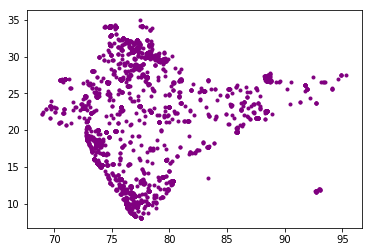

In [12]:
plt.scatter(indian_hotels_filtered['longitude'], indian_hotels_filtered['latitude'], marker='.', color="purple")

**Are there ways to predict ratings given the amenities?**

**Are there regional bias in hotel ratings?**

#### Feature engineering for specific ratings

In [13]:
indian_hotels_filtered['additional_info'].head()

0    Room Service|Internet Access|Restaurant|Free I...
1                                 Room Service|Gym/Spa
2                             Restaurant|Swimming Pool
3                                                  NaN
4                           Internet Access|Restaurant
Name: additional_info, dtype: object

In [14]:
amenities = indian_hotels_filtered['additional_info'].str.split('|',expand=True)

In [15]:
stay_review_rating = indian_hotels_filtered['site_stay_review_rating'].str.split('|', expand=True)

In [16]:
stay_review_rating.head()

,0,1,2,3,4,5
0,Service Quality::3.9,Amenities::3.7,Food and Drinks::3.8,Value for Money::4.1,Location::4.0,Cleanliness::4.1
1,Service Quality::4.7,Amenities::4.7,Food and Drinks::4.3,Value for Money::4.7,Location::4.8,Cleanliness::4.8
2,Service Quality::2.5,Amenities::2.5,Food and Drinks::1.0,Value for Money::2.5,Location::2.5,Cleanliness::1.0
3,Service Quality::5.0,Amenities::5.0,Food and Drinks::5.0,Value for Money::5.0,Location::5.0,Cleanliness::5.0
4,Service Quality::2.7,Amenities::2.6,Food and Drinks::2.5,Value for Money::2.9,Location::2.9,Cleanliness::2.6


In [17]:
stay_review_rating = stay_review_rating.rename(index = str, columns={0:"Service_Quality", 1: "Amenities", 2: "Food_and_Drinks", 3: "Value_for_Money", 4: "Location", 5: "Cleaniness"})

In [18]:
stay_review_rating.columns[0]

'Service_Quality'

In [19]:
stay_review_rating['Service_Quality'] = stay_review_rating['Service_Quality'].str.split('::').str[-1]
stay_review_rating['Amenities'] = stay_review_rating['Amenities'].str.split('::').str[-1]
stay_review_rating['Food_and_Drinks'] = stay_review_rating['Food_and_Drinks'].str.split('::').str[-1]
stay_review_rating['Value_for_Money'] = stay_review_rating['Value_for_Money'].str.split('::').str[-1]
stay_review_rating['Location'] = stay_review_rating['Location'].str.split('::').str[-1]
stay_review_rating['Cleaniness'] = stay_review_rating['Cleaniness'].str.split('::').str[-1]
stay_review_rating.head()

,Service_Quality,Amenities,Food_and_Drinks,Value_for_Money,Location,Cleaniness
0,3.9,3.7,3.8,4.1,4.0,4.1
1,4.7,4.7,4.3,4.7,4.8,4.8
2,2.5,2.5,1.0,2.5,2.5,1.0
3,5.0,5.0,5.0,5.0,5.0,5.0
4,2.7,2.6,2.5,2.9,2.9,2.6


In [20]:
stay_review_rating_clean = stay_review_rating.dropna().astype('float', errors='ignore') 
stay_review_rating_clean['Service_Quality'] = pd.to_numeric(stay_review_rating['Service_Quality'], errors='coerce')
stay_review_rating_clean['Amenities'] = pd.to_numeric(stay_review_rating['Amenities'], errors='coerce')
stay_review_rating_clean['Food_and_Drinks'] = pd.to_numeric(stay_review_rating['Food_and_Drinks'], errors='coerce')
stay_review_rating_clean['Value_for_Money'] = pd.to_numeric(stay_review_rating['Value_for_Money'], errors='coerce')
stay_review_rating_clean['Location'] = pd.to_numeric(stay_review_rating['Location'], errors='coerce')
stay_review_rating_clean['Cleaniness'] = pd.to_numeric(stay_review_rating['Cleaniness'], errors='coerce')


In [21]:
stay_review_rating_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3997 entries, 0 to 3999
Data columns (total 6 columns):
Service_Quality    2414 non-null float64
Amenities          2414 non-null float64
Food_and_Drinks    2414 non-null float64
Value_for_Money    2414 non-null float64
Location           2414 non-null float64
Cleaniness         2414 non-null float64
dtypes: float64(6)
memory usage: 218.6+ KB


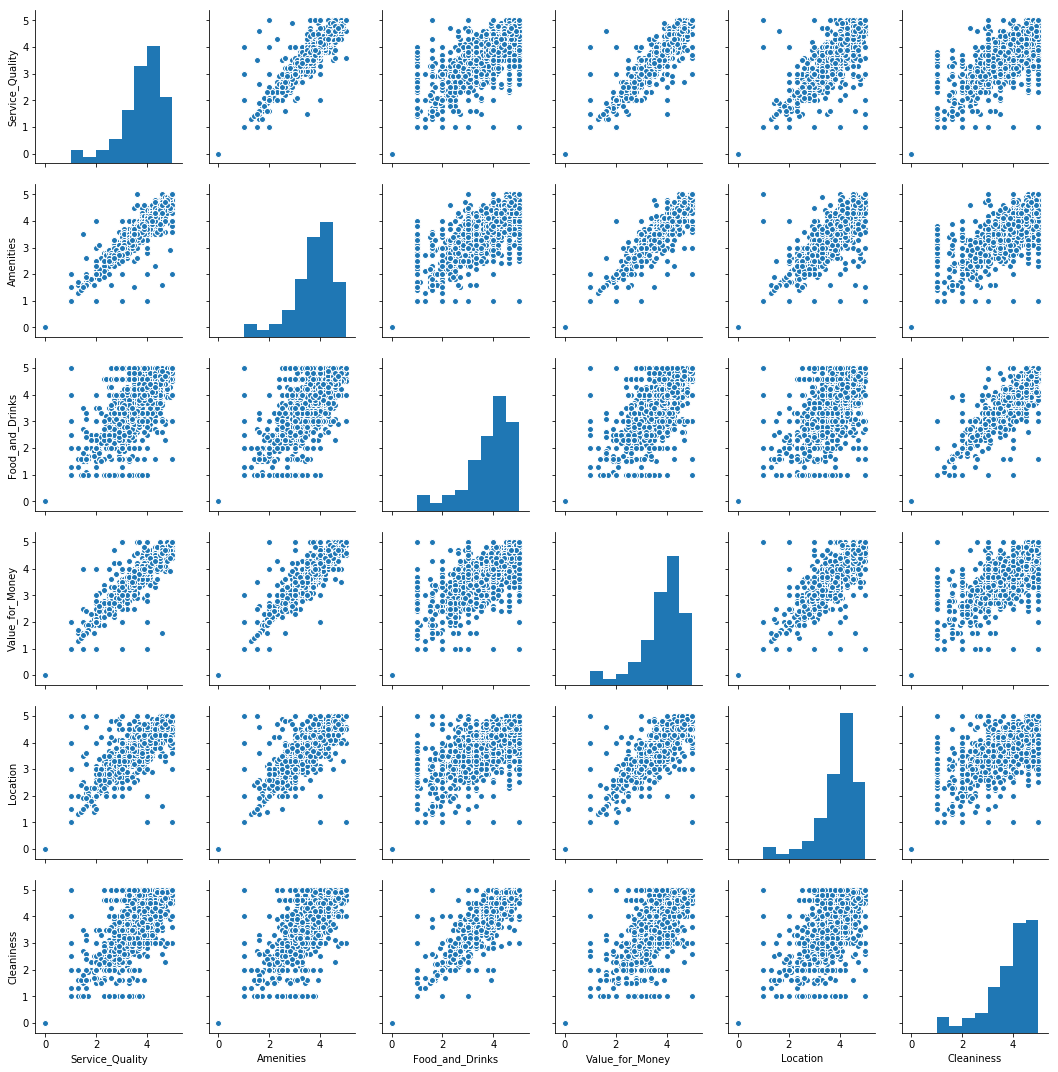

In [22]:
sns.pairplot(stay_review_rating_clean.dropna())

#### Feature engineering for Amenities

In [23]:
import itertools

hotels = indian_hotels_filtered

top_amenities = pd.Series(
    list(itertools.chain(*hotels['room_facilities']\
                             .fillna("")\
                             .map(lambda f: [am.strip() for am in f.split("|")])\
                             .values\
                             .tolist()))).value_counts().head(12).index.values
temp = hotels.assign(amenities=hotels['room_facilities'].fillna("").map(
        lambda f: [am.strip() for am in f.split("|")]))

for amenity in top_amenities:
    temp[amenity] = temp.amenities.map(lambda l: amenity in l)

In [24]:
temp.columns

Index(['additional_info', 'address', 'area', 'city', 'country', 'crawl_date',
       'guest_recommendation', 'hotel_brand', 'hotel_category',
       'hotel_description', 'hotel_facilities', 'hotel_star_rating',
       'image_count', 'latitude', 'locality', 'longitude', 'pageurl',
       'point_of_interest', 'property_id', 'property_name', 'property_type',
       'province', 'qts', 'query_time_stamp', 'review_count_by_category',
       'room_area', 'room_count', 'room_facilities', 'room_type',
       'similar_hotel', 'site_review_count', 'site_review_rating',
       'site_stay_review_rating', 'sitename', 'state', 'uniq_id', 'amenities',
       'Room Service', 'Basic Bathroom Amenities', 'Hot / Cold Running Water',
       'Housekeeping', 'Ceiling Fan', 'Air Conditioning',
       'Cable / Satellite / Pay TV available', 'Attached Bathroom',
       'Telephone', 'Mirror', 'TV', 'Desk in Room'],
      dtype='object')

In [25]:
list(itertools.chain(*hotels['room_facilities']\
                             .fillna("")\
                             .map(lambda f: [am.strip() for am in f.split("|")])\
                             .values\
                             .tolist()))

['Room Service',
 'Basic Bathroom Amenities',
 'Cable / Satellite / Pay TV available',
 'Ceiling Fan',
 'Heating Facility (on request)',
 'Internet Connection In Room',
 'Telephone',
 'Shower Facility Available',
 'Breakfast Available (surcharge)',
 'Hot / Cold Running Water',
 'Housekeeping',
 'Desk in Room',
 'Extra Bed, Towels, Linens, Bedding (on request)',
 'Window Opens',
 'Makeup / Shaving Mirror',
 'Safe - In - Room',
 'Hill View from all Rooms',
 'HD / LCD Satellite TV',
 'Sofa Table / Extra Seats',
 'Private Garden',
 'TV',
 'Bathrobes',
 'Mirror',
 'Gas Cylinder - Chargeable',
 'Luggage Rack',
 'Attached Bathroom',
 'Bedside Table',
 'Clothes Hook in Bathroom',
 'Complete Bedding',
 'Daily Room Cleaning',
 'Dustbins',
 'Extra Toilteries on Demand',
 'Modern Toilet Facilities',
 'Room Door Fitted with Lock and Key',
 'Room with Window/Ventilation',
 'Rooms with Attached Bathrooms',
 'Sufficient Lighting',
 'Western Toilet Seat',
 'Breakfast chargeable',
 'Room Service',
 'Air

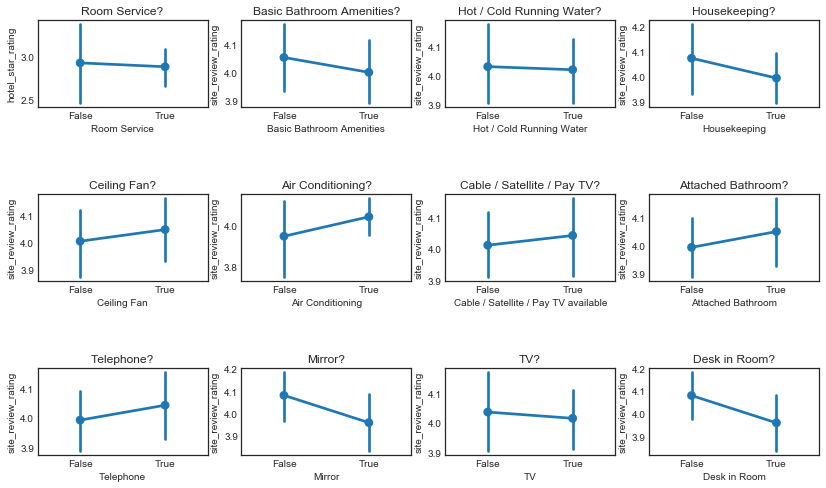

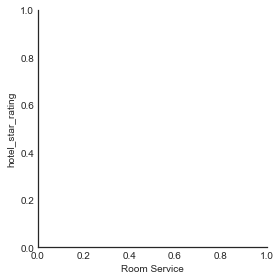

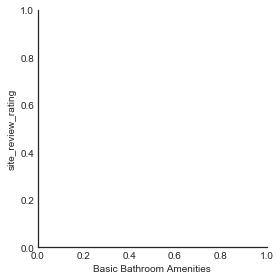

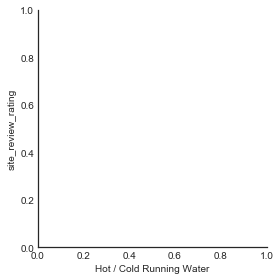

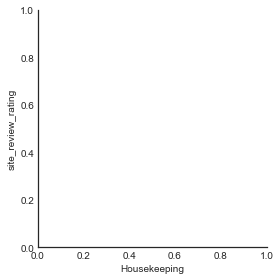

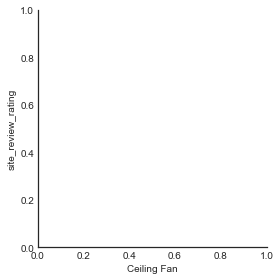

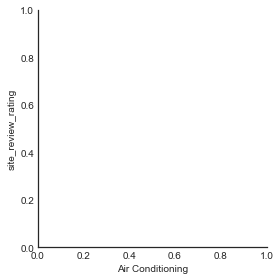

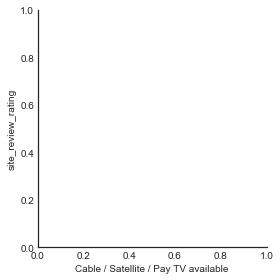

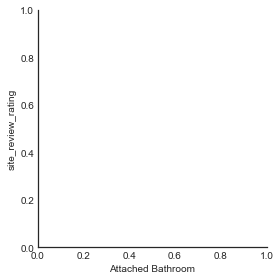

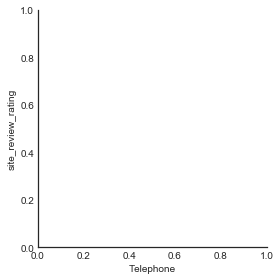

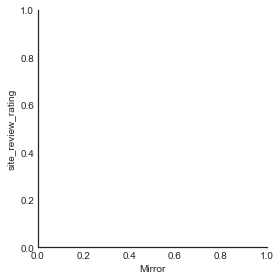

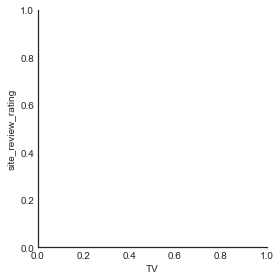

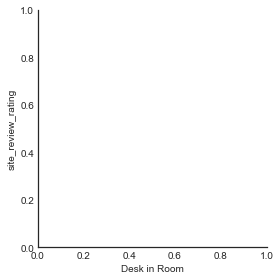

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

f, axarr = plt.subplots(3, 4, figsize=(14, 8))
f.subplots_adjust(hspace=1)

sns.factorplot(x='Room Service', y='hotel_star_rating', data=temp.dropna(), ax=axarr[0][0])
axarr[0][0].set_title("Room Service?")

sns.factorplot(x='Basic Bathroom Amenities', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[0][1])
axarr[0][1].set_title("Basic Bathroom Amenities?")

sns.factorplot(x='Hot / Cold Running Water', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[0][2])
axarr[0][2].set_title("Hot / Cold Running Water?")

sns.factorplot(x='Housekeeping', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[0][3])
axarr[0][3].set_title("Housekeeping?")

sns.factorplot(x='Ceiling Fan', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[1][0])
axarr[1][0].set_title("Ceiling Fan?")

sns.factorplot(x='Air Conditioning', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[1][1])
axarr[1][1].set_title("Air Conditioning?")

sns.factorplot(x='Cable / Satellite / Pay TV available', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[1][2])
axarr[1][2].set_title("Cable / Satellite / Pay TV?")

sns.factorplot(x='Attached Bathroom', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[1][3])
axarr[1][3].set_title("Attached Bathroom?")

sns.factorplot(x='Telephone', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[2][0])
axarr[2][0].set_title("Telephone?")

sns.factorplot(x='Mirror', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[2][1])
axarr[2][1].set_title("Mirror?")

sns.factorplot(x='TV', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[2][2])
axarr[2][2].set_title("TV?")

sns.factorplot(x='Desk in Room', y='site_review_rating', 
               data=temp.dropna(), ax=axarr[2][3])
axarr[2][3].set_title("Desk in Room?")

import matplotlib.pyplot as plt
f.savefig('amenities_corr_to_rating.png')

![Image of Amenities](amenities_corr_to_rating.png)

#### Q&A